#### Pandas Tutorial - Part 48

This notebook covers various Series methods including:
- Calculating skewness with `skew()`
- Shifting data without copying with `slice_shift()`
- Converting Series to JSON with `to_json()`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import stats

%matplotlib inline

##### Calculating Skewness

The `skew()` method calculates the unbiased skewness of a Series. Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.

In [2]:
# Create a Series with a normal distribution
np.random.seed(42)
normal_data = pd.Series(np.random.normal(0, 1, 1000))

# Calculate skewness
normal_skew = normal_data.skew()
print(f"Skewness of normal distribution: {normal_skew}")

Skewness of normal distribution: 0.11697636882001396


In [3]:
# Create a Series with a right-skewed distribution
right_skewed = pd.Series(np.random.exponential(1, 1000))

# Calculate skewness
right_skew = right_skewed.skew()
print(f"Skewness of right-skewed distribution: {right_skew}")

Skewness of right-skewed distribution: 1.983788869861754


In [4]:
# Create a Series with a left-skewed distribution
left_skewed = pd.Series(10 - np.random.exponential(1, 1000))

# Calculate skewness
left_skew = left_skewed.skew()
print(f"Skewness of left-skewed distribution: {left_skew}")

Skewness of left-skewed distribution: -1.6378355027516647


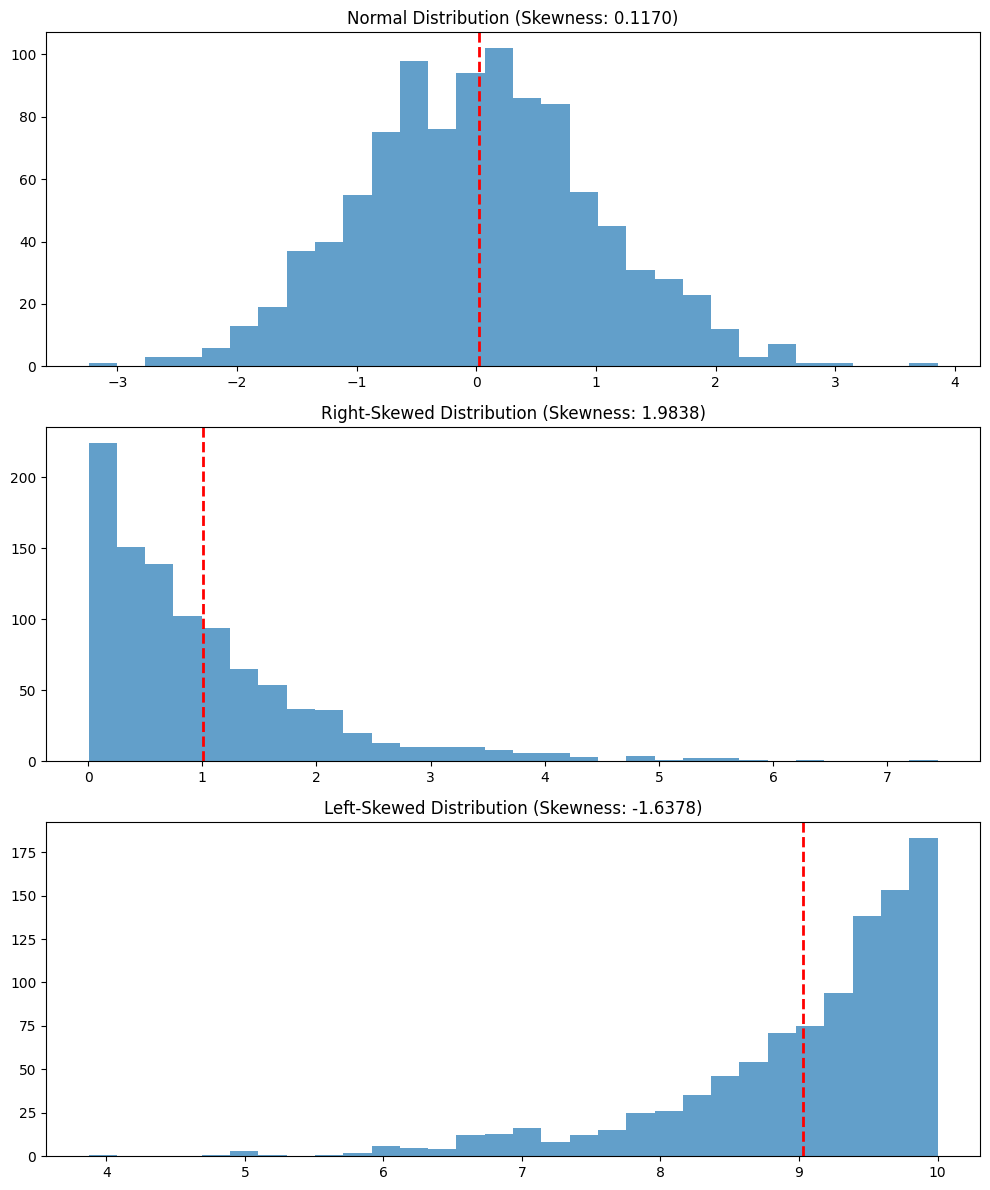

In [5]:
# Visualize the distributions
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Normal distribution
axes[0].hist(normal_data, bins=30, alpha=0.7)
axes[0].set_title(f'Normal Distribution (Skewness: {normal_skew:.4f})')
axes[0].axvline(normal_data.mean(), color='r', linestyle='dashed', linewidth=2)

# Right-skewed distribution
axes[1].hist(right_skewed, bins=30, alpha=0.7)
axes[1].set_title(f'Right-Skewed Distribution (Skewness: {right_skew:.4f})')
axes[1].axvline(right_skewed.mean(), color='r', linestyle='dashed', linewidth=2)

# Left-skewed distribution
axes[2].hist(left_skewed, bins=30, alpha=0.7)
axes[2].set_title(f'Left-Skewed Distribution (Skewness: {left_skew:.4f})')
axes[2].axvline(left_skewed.mean(), color='r', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()

In [6]:
# Create a Series with missing values
data_with_nan = pd.Series([1, 2, 3, np.nan, 5, 6, np.nan, 8, 9, 10])
print("Series with missing values:")
print(data_with_nan)

Series with missing values:
0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     9.0
9    10.0
dtype: float64


In [7]:
# Calculate skewness with skipna=True (default)
skew_skipna = data_with_nan.skew()
print(f"Skewness with skipna=True: {skew_skipna}")

Skewness with skipna=True: 0.0


In [8]:
# Calculate skewness with skipna=False
skew_no_skipna = data_with_nan.skew(skipna=False)
print(f"Skewness with skipna=False: {skew_no_skipna}")

Skewness with skipna=False: nan


##### Shifting Data Without Copying

The `slice_shift()` method shifts the data without copying. Unlike `shift()`, which returns a Series of the same length with NaN values, `slice_shift()` returns a smaller Series without the dropped periods.

In [9]:
# Create a Series
s = pd.Series([1, 2, 3, 4, 5])
print("Original Series:")
print(s)

Original Series:
0    1
1    2
2    3
3    4
4    5
dtype: int64


In [10]:
# Shift using shift() method
s_shift = s.shift(periods=2)
print("Series shifted by 2 periods using shift():")
print(s_shift)

Series shifted by 2 periods using shift():
0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
dtype: float64


In [12]:
# Shift using the shift() method
s_shifted = s.shift(periods=2)
print("Series shifted by 2 periods:")
print(s_shifted)

Series shifted by 2 periods:
0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
dtype: float64


In [13]:
# Negative shift using shift() method
s_neg_shift = s.shift(periods=-2)
print("Series shifted by -2 periods using shift():")
print(s_neg_shift)

Series shifted by -2 periods using shift():
0    3.0
1    4.0
2    5.0
3    NaN
4    NaN
dtype: float64


In [17]:
# Negative shift using shift() method
s_neg_shift = s.shift(periods=-2)
print("Series shifted by -2 periods:")
print(s_neg_shift)

Series shifted by -2 periods:
0    3.0
1    4.0
2    5.0
3    NaN
4    NaN
dtype: float64


In [15]:
# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
print("Original DataFrame:")
print(df)

Original DataFrame:
   A   B
0  1  10
1  2  20
2  3  30
3  4  40
4  5  50


In [18]:
# Shift DataFrame using shift() method
df_shifted = df.shift(periods=2)
print("DataFrame shifted by 2 periods:")
print(df_shifted)

DataFrame shifted by 2 periods:
     A     B
0  NaN   NaN
1  NaN   NaN
2  1.0  10.0
3  2.0  20.0
4  3.0  30.0


##### Converting Series to JSON

The `to_json()` method converts a Series to a JSON string.

In [19]:
# Create a Series
s = pd.Series(['a', 'b', 'c', 'd'], index=['w', 'x', 'y', 'z'])
print("Original Series:")
print(s)

Original Series:
w    a
x    b
y    c
z    d
dtype: object


In [20]:
# Convert to JSON (default orient='index')
json_index = s.to_json()
print("JSON with orient='index' (default):")
print(json_index)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_index), indent=4))

JSON with orient='index' (default):
{"w":"a","x":"b","y":"c","z":"d"}

Pretty printed JSON:
{
    "w": "a",
    "x": "b",
    "y": "c",
    "z": "d"
}


In [21]:
# Convert to JSON with orient='split'
json_split = s.to_json(orient='split')
print("JSON with orient='split':")
print(json_split)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_split), indent=4))

JSON with orient='split':
{"name":null,"index":["w","x","y","z"],"data":["a","b","c","d"]}

Pretty printed JSON:
{
    "name": null,
    "index": [
        "w",
        "x",
        "y",
        "z"
    ],
    "data": [
        "a",
        "b",
        "c",
        "d"
    ]
}


In [22]:
# Convert to JSON with orient='records'
json_records = s.to_json(orient='records')
print("JSON with orient='records':")
print(json_records)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_records), indent=4))

JSON with orient='records':
["a","b","c","d"]

Pretty printed JSON:
[
    "a",
    "b",
    "c",
    "d"
]


In [23]:
# Convert to JSON with orient='values'
json_values = s.to_json(orient='values')
print("JSON with orient='values':")
print(json_values)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_values), indent=4))

JSON with orient='values':
["a","b","c","d"]

Pretty printed JSON:
[
    "a",
    "b",
    "c",
    "d"
]


In [24]:
# Convert to JSON with orient='table'
json_table = s.to_json(orient='table')
print("JSON with orient='table':")
print(json_table)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_table), indent=4))

JSON with orient='table':
{"schema":{"fields":[{"name":"index","type":"string"},{"name":"values","type":"string"}],"primaryKey":["index"],"pandas_version":"1.4.0"},"data":[{"index":"w","values":"a"},{"index":"x","values":"b"},{"index":"y","values":"c"},{"index":"z","values":"d"}]}

Pretty printed JSON:
{
    "schema": {
        "fields": [
            {
                "name": "index",
                "type": "string"
            },
            {
                "name": "values",
                "type": "string"
            }
        ],
        "primaryKey": [
            "index"
        ],
        "pandas_version": "1.4.0"
    },
    "data": [
        {
            "index": "w",
            "values": "a"
        },
        {
            "index": "x",
            "values": "b"
        },
        {
            "index": "y",
            "values": "c"
        },
        {
            "index": "z",
            "values": "d"
        }
    ]
}


In [25]:
# Create a Series with different data types
s_mixed = pd.Series([1, 2.5, 'a', True, pd.Timestamp('2023-01-01')])
print("Series with mixed data types:")
print(s_mixed)

Series with mixed data types:
0                      1
1                    2.5
2                      a
3                   True
4    2023-01-01 00:00:00
dtype: object


In [26]:
# Convert to JSON
json_mixed = s_mixed.to_json()
print("JSON for Series with mixed data types:")
print(json_mixed)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_mixed), indent=4))

JSON for Series with mixed data types:
{"0":1,"1":2.5,"2":"a","3":true,"4":1672531200000}

Pretty printed JSON:
{
    "0": 1,
    "1": 2.5,
    "2": "a",
    "3": true,
    "4": 1672531200000
}


In [27]:
# Create a Series with datetime index
date_s = pd.Series([1, 2, 3, 4], index=pd.date_range('2023-01-01', periods=4))
print("Series with datetime index:")
print(date_s)

Series with datetime index:
2023-01-01    1
2023-01-02    2
2023-01-03    3
2023-01-04    4
Freq: D, dtype: int64


In [28]:
# Convert to JSON with default date_format ('epoch')
json_date_epoch = date_s.to_json()
print("JSON with default date_format ('epoch'):")
print(json_date_epoch)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_date_epoch), indent=4))

JSON with default date_format ('epoch'):
{"1672531200000":1,"1672617600000":2,"1672704000000":3,"1672790400000":4}

Pretty printed JSON:
{
    "1672531200000": 1,
    "1672617600000": 2,
    "1672704000000": 3,
    "1672790400000": 4
}


In [29]:
# Convert to JSON with date_format='iso'
json_date_iso = date_s.to_json(date_format='iso')
print("JSON with date_format='iso':")
print(json_date_iso)

# Pretty print the JSON
print("\nPretty printed JSON:")
print(json.dumps(json.loads(json_date_iso), indent=4))

JSON with date_format='iso':
{"2023-01-01T00:00:00.000":1,"2023-01-02T00:00:00.000":2,"2023-01-03T00:00:00.000":3,"2023-01-04T00:00:00.000":4}

Pretty printed JSON:
{
    "2023-01-01T00:00:00.000": 1,
    "2023-01-02T00:00:00.000": 2,
    "2023-01-03T00:00:00.000": 3,
    "2023-01-04T00:00:00.000": 4
}


In [30]:
# Convert to JSON with different date_unit
json_date_s = date_s.to_json(date_unit='s')
json_date_ms = date_s.to_json(date_unit='ms')  # default
json_date_us = date_s.to_json(date_unit='us')
json_date_ns = date_s.to_json(date_unit='ns')

print("JSON with date_unit='s':")
print(json_date_s)
print("\nJSON with date_unit='ms' (default):")
print(json_date_ms)
print("\nJSON with date_unit='us':")
print(json_date_us)
print("\nJSON with date_unit='ns':")
print(json_date_ns)

JSON with date_unit='s':
{"1672531200":1,"1672617600":2,"1672704000":3,"1672790400":4}

JSON with date_unit='ms' (default):
{"1672531200000":1,"1672617600000":2,"1672704000000":3,"1672790400000":4}

JSON with date_unit='us':
{"1672531200000000":1,"1672617600000000":2,"1672704000000000":3,"1672790400000000":4}

JSON with date_unit='ns':
{"1672531200000000000":1,"1672617600000000000":2,"1672704000000000000":3,"1672790400000000000":4}


In [31]:
# Convert to JSON with indent
json_indent = s.to_json(indent=4)
print("JSON with indent=4:")
print(json_indent)

JSON with indent=4:
{
    "w":"a",
    "x":"b",
    "y":"c",
    "z":"d"
}


##### Conclusion

In this notebook, we've explored various Series methods in pandas:

1. Calculating skewness with `skew()`, which measures the asymmetry of the probability distribution of a Series.
2. Shifting data without copying with `slice_shift()`, which returns a smaller Series without the dropped periods.
3. Converting Series to JSON with `to_json()`, which provides various options for formatting and encoding.

These methods are essential tools for data manipulation, analysis, and serialization in pandas, allowing for flexible and powerful operations on your data.